## About YOLO_Training Notebook

In this notebook, we trained and evaluated our **YOLOv10** model, which is specifically designed to detect vehicle license plates in images or videos. This notebook demonstrates the step-by-step process of setting up the YOLO model, training it on the custom dataset, and assessing its performance on validation and test data.

### About YOLO and YOLOv10

**YOLO (You Only Look Once)** is a groundbreaking object detection algorithm known for its ability to perform real-time detection with high accuracy. It is a single-stage detection model that treats object detection as a regression problem, predicting both the bounding box coordinates and class probabilities directly from the input image in a single forward pass. Unlike traditional object detection methods, YOLO does not rely on region proposal networks or exhaustive sliding windows, which makes it incredibly fast.

### Key Features of YOLO:
1. **Real-time Performance**: YOLO is designed for speed, making it suitable for applications requiring quick and efficient processing, such as surveillance systems or autonomous vehicles.
2. **Unified Architecture**: YOLO processes the entire image in one go, learning global context, which reduces false positives compared to traditional methods.
3. **Generalization**: YOLO can generalize well to unseen data, making it robust for real-world scenarios.
4. **Customizability**: It supports training on custom datasets, allowing the model to detect domain-specific objects like license plates in our project.

---

### Advancements in YOLOv10

YOLOv10 builds upon the legacy of previous YOLO versions with a host of improvements aimed at boosting accuracy and efficiency. It incorporates cutting-edge research in object detection, including architectural optimizations, advanced training techniques, and better handling of small objects and challenging scenarios. Below are the standout features of YOLOv10:

 1. **Improved Backbone Architecture**: YOLOv10 adopts a more powerful backbone network, which enhances feature extraction capabilities. This leads to better detection of objects in complex backgrounds and challenging lighting conditions.

 2. **Enhanced Detection Head**: The detection head in YOLOv10 is more refined, providing better localization and classification accuracy, particularly for small objects like license plates.

 3. **Anchor-free Mechanism**: YOLOv10 employs an anchor-free detection mechanism, reducing the complexity of defining anchor boxes while maintaining high precision.

 4. **Dynamic Label Assignment**: The model dynamically assigns labels during training, improving its adaptability to diverse datasets and making it better at handling imbalanced data.

 5. **Improved Multi-scale Detection**: Multi-scale detection capabilities ensure that objects of varying sizes, including small and distant license plates, are detected accurately.

 6. **Optimized Training Techniques**: YOLOv10 incorporates advanced techniques like mosaic augmentation, label smoothing, and adaptive learning rates, enhancing training stability and model performance.

---

### Why YOLOv10 for License Plate Detection?
License plate detection requires precise bounding box localization and robustness against variations in angle, lighting, and background. YOLOv10's advancements in small object detection and its real-time capabilities make it an ideal choice for this application. By leveraging its strengths, we achieve high accuracy while maintaining the speed required for video and live feed processing.

### Applications of YOLOv10 in Real-world Scenarios:
1. **Traffic Monitoring**: Real-time detection of license plates to monitor vehicles on highways or city roads.
2. **Law Enforcement**: Automated systems for detecting vehicles violating traffic rules.
3. **Parking Management**: Vehicle identification for entry/exit in parking lots.
4. **Toll Collection**: Automated vehicle recognition for efficient toll processing.


### Key Steps Covered in the Notebook:
1. **Data Preparation**: Custom dataset integration and preprocessing to ensure compatibility with the YOLO format.

2. **Model Training**:
   - Configuring YOLOv10 for detecting license plates.
   - Training the model on the custom dataset while monitoring performance metrics like loss and accuracy.

3. **Evaluation**:
   - Assessing the model’s detection capabilities using the validation and test datasets.
   - Visualizing predictions and bounding boxes for qualitative analysis.

4. **Result Analysis**:
   - Evaluating the model's precision, recall, and overall detection accuracy to validate its readiness for deployment.

### Objective:
The goal of this notebook is to fine-tune YOLOv10 for accurate and efficient license plate detection, laying the foundation for the subsequent recognition phase using OCR techniques.


### Training in Kaggle Notebook

In [2]:
!pip -q install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.4/898.4 kB 14.0 MB/s eta 0:00:00


In [27]:
#importing important libraries and modules
import shutil
from ultralytics import YOLO
from IPython.display import FileLink
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


### Loading the custom dataset that we created in Data_Exploration file into Kaggle input directory where we have trained our model

In [ ]:
# Source and destination paths
source_folder = '/kaggle/input/archive5'
destination_folder = '/kaggle/working/archive5'

# Copy the folder
shutil.copytree(source_folder, destination_folder)

print(f"Folder '{source_folder}' has been copied to '{destination_folder}'.")


Folder '/kaggle/input/archive5' has been copied to '/kaggle/working/archive5'.


### Loading data into kaggle working directory to utilized during training process

In [ ]:
# Define the folder path and zip file name
folder_to_zip = '/kaggle/working/archive5'
output_zip_file = '/kaggle/working/archive5_0.zip'

# Compress the folder
shutil.make_archive(output_zip_file.replace('.zip', ''), 'zip', folder_to_zip)

print(f"Folder compressed into: {output_zip_file}")


Folder compressed into: /kaggle/working/archive5_0.zip


In [ ]:

# Create a download link for the zip file
FileLink(output_zip_file)


/kaggle/working/archive5_0.zip

Fortunately, when we created our dataset, we have saved it in YOLO complatible format. Here is the image that shows how our data directory looks like. To train the YOLO model we require a .yaml format defining our directories.

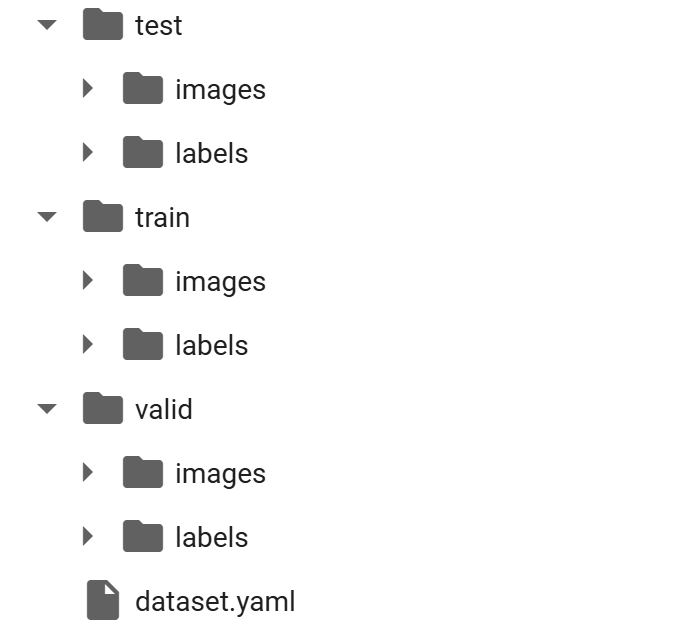



And here is how the .yaml file looks like

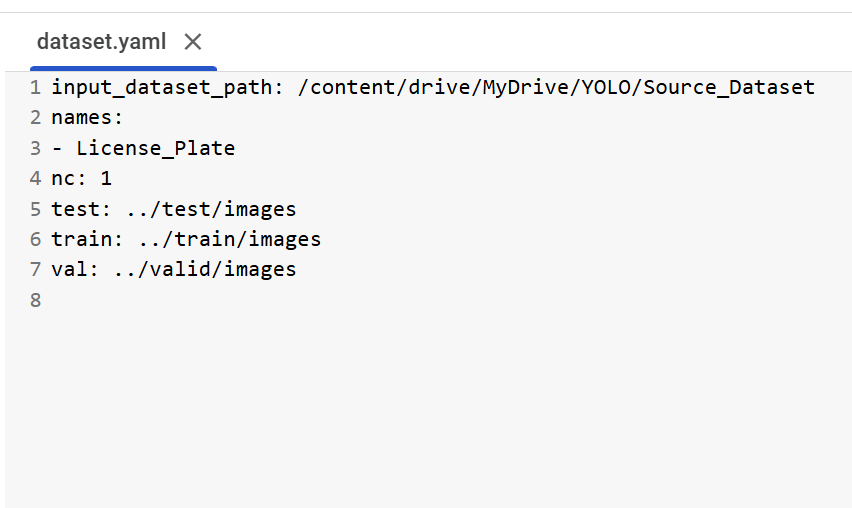


### Model Training with YOLOv10b

In this section, we train a **YOLOv10b** model for object detection. The model is trained on a custom dataset located in a specified directory, with various configurations such as the number of epochs, image size, and batch size.

#### About YOLOv10b:

**YOLOv10** is a state-of-the-art deep learning model for object detection. It is part of the YOLO (You Only Look Once) family, which is widely used due to its speed and accuracy in detecting objects in images and videos.

- **YOLOv10b** refers to a specific version of YOLOv10 with a particular set of hyperparameters and model architecture. The **"b"** typically stands for a variant of the model that balances performance and efficiency. In some contexts, "b" can refer to a "base" model that is more lightweight and faster but slightly less powerful in comparison to larger versions (like "YOLOv10x" or "YOLOv10l").

- **Number of Parameters**: YOLOv10b has approximately **10.6 million parameters**, making it relatively lightweight and suitable for tasks requiring real-time inference. Despite having fewer parameters compared to larger versions, it still offers excellent accuracy for many object detection tasks.

#### Key points to note:

- **Model Loading**: The YOLOv10b model is loaded from pre-trained weights (`yolov10b.pt`). This provides a starting point for training the model on our custom dataset.

- **Custom Training Directory**: A custom directory is defined to store the training outputs such as model weights, logs, and other relevant files. This helps organize different training sessions.

#### Training Configuration:

- The `data` parameter points to the dataset configuration file (`dataset.yaml`), which contains all the necessary information about the dataset structure and paths.
- The `epochs` parameter specifies the number of iterations to train the model (set to 100).
- The `imgsz` parameter defines the input image size (set to 640 pixels).
- The `batch` parameter sets the batch size for training (set to 16).
- The `project` parameter specifies the directory where the results of the training session will be stored.
- The `name` parameter gives a unique name to this particular training run, which helps in distinguishing between different sessions.

This setup ensures that the training process is well-organized, and the results can be efficiently managed and analyzed once the training completes.


In [ ]:
# Load YOLOv10b model
model = YOLO("/kaggle/working/archive5/Training_Folder/Pretrained_weights/yolov10b.pt")

# Define the custom directory for runs
custom_runs_dir = "/kaggle/working/archive5/Trained_Folder"

# Train the model with a custom runs directory
model.train(
    data="/kaggle/working/archive5/Yolo_custom_Dataset/dataset.yaml",
    epochs=100,
    imgsz=640,
    batch=16,
    project=custom_runs_dir,  # Set the project directory for saving runs
    name="runs"  # Subdirectory for this specific training session
)


Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/archive5/weights/yolov10b.pt, data=/kaggle/working/archive5/Yolo_custom_Dataset/dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/kaggle/working/, name=yolov10b_training2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=

100%|██████████| 755k/755k [00:00<00:00, 8.13MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  4   1444864  ultralytics.nn.modules.block.C2f             [256, 256, 4, True]           
  5                  -1  1    137728  ultralytics.nn.modules.block.SCDown          [256, 512, 3, 2]              
  6                  -1  4   5773312  ultralytics.nn.modules.block.C2f             [512, 512, 4, True]           
  7                  -1  1    268800  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 43.9MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/archive5/Yolo_custom_Dataset/train/labels... 2161 images, 3 backgrounds, 1 corrupt: 100%|██████████| 2162/2162 [00:01<00:00, 1123.11it/s]

train: WARNING ⚠️ /kaggle/working/archive5/Yolo_custom_Dataset/train/images/pic_359_jpg.rf.7e7d350021929d76e4083b39c0c9863d.jpg: ignoring corrupt image/label: cannot identify image file '/kaggle/working/archive5/Yolo_custom_Dataset/train/images/pic_359_jpg.rf.7e7d350021929d76e4083b39c0c9863d.jpg'


train: New cache created: /kaggle/working/archive5/Yolo_custom_Dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/archive5/Yolo_custom_Dataset/valid/labels... 614 images, 2 backgrounds, 0 corrupt: 100%|██████████| 614/614 [00:00<00:00, 966.25it/s] 

val: New cache created: /kaggle/working/archive5/Yolo_custom_Dataset/valid/labels.cache


Plotting labels to /kaggle/working/yolov10b_training2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 135 weight(decay=0.0), 148 weight(decay=0.0005), 147 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /kaggle/working/yolov10b_training2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      11.8G      2.972      4.211      2.688          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.27it/s]


                   all        614        651      0.304      0.398      0.234     0.0955

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      11.7G      3.129      2.458      2.756          4        640: 100%|██████████| 136/136 [01:35<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.50it/s]

                   all        614        651      0.737      0.575      0.651      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      11.7G      3.098      2.239      2.731          4        640: 100%|██████████| 136/136 [01:35<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.50it/s]

                   all        614        651      0.761      0.596       0.69      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      11.8G      2.986      2.067      2.678          2        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.50it/s]

                   all        614        651      0.838      0.724        0.8      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      11.8G      2.885      1.851      2.598          2        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.53it/s]

                   all        614        651      0.903      0.762      0.858      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      11.8G      2.843       1.84      2.602          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.52it/s]

                   all        614        651      0.882      0.748      0.838      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      11.8G      2.791      1.749      2.558          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.51it/s]

                   all        614        651       0.94      0.766      0.867       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      11.8G      2.796       1.67       2.56          4        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.52it/s]

                   all        614        651      0.867      0.845      0.889      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      11.8G      2.782      1.656      2.513          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.51it/s]

                   all        614        651      0.838      0.796      0.861      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      11.7G      2.735      1.625      2.544          2        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.52it/s]

                   all        614        651      0.894      0.753      0.864      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      11.8G      2.677      1.545      2.511          4        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.52it/s]

                   all        614        651      0.902      0.805      0.893      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      11.7G      2.671      1.476       2.48          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.52it/s]

                   all        614        651      0.917       0.81      0.895      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      11.8G      2.638      1.455      2.491          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.52it/s]

                   all        614        651      0.909      0.829      0.905      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      11.7G      2.599      1.426      2.478          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.52it/s]

                   all        614        651      0.883      0.803      0.886      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      11.8G       2.61      1.428      2.482          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.53it/s]

                   all        614        651      0.867       0.79      0.862      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      11.7G      2.584      1.391      2.452          3        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.51it/s]

                   all        614        651      0.911      0.802      0.894      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      11.8G       2.58       1.37      2.421          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.52it/s]

                   all        614        651      0.919      0.832      0.914      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      11.8G       2.54      1.324      2.421          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.53it/s]

                   all        614        651      0.932      0.853      0.921      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      11.8G      2.529       1.33      2.436          2        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.53it/s]

                   all        614        651      0.932      0.805      0.908      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      11.8G      2.585      1.324      2.451          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.919      0.821       0.91      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      11.8G      2.533      1.277      2.408          2        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.53it/s]

                   all        614        651      0.921      0.807      0.892      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      11.8G       2.52      1.265      2.417          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.52it/s]

                   all        614        651      0.949      0.863       0.93      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      11.7G      2.483      1.223      2.371          2        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.918      0.831      0.901       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      11.8G        2.5      1.266      2.401          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.52it/s]

                   all        614        651      0.934      0.831      0.913      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      11.7G      2.486      1.266      2.382          0        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.944      0.857      0.937       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      11.8G      2.493      1.222      2.394          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.913      0.877      0.931       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      11.8G      2.471      1.252      2.397          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.53it/s]

                   all        614        651      0.963      0.826      0.933      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      11.8G      2.393      1.171       2.35          0        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.53it/s]

                   all        614        651      0.966       0.84      0.936      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      11.7G       2.47      1.201      2.362          4        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.53it/s]

                   all        614        651      0.918      0.874      0.916      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      11.8G      2.429      1.176       2.38          2        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.52it/s]

                   all        614        651      0.933      0.871      0.936      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      11.7G      2.427      1.148      2.384          5        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.942      0.863      0.939      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      11.7G      2.448      1.154      2.357          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.952      0.856       0.94      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      11.7G      2.372      1.141      2.312          0        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.52it/s]

                   all        614        651      0.936      0.901      0.939      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      11.8G      2.409      1.166      2.311          0        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.53it/s]

                   all        614        651      0.961      0.845      0.939      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      11.8G      2.383      1.126      2.318          3        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.942      0.877      0.943      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      11.8G      2.349       1.11      2.315          3        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.53it/s]

                   all        614        651      0.953      0.874      0.944      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      11.7G      2.378      1.094      2.329          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651       0.95      0.871      0.948      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      11.8G      2.382      1.096      2.332          2        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.948      0.865      0.943      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      11.8G      2.388      1.078       2.34          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.53it/s]

                   all        614        651      0.935      0.892      0.947       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      11.8G      2.362      1.084      2.315          2        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651       0.95      0.855      0.932       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      11.8G      2.351      1.076      2.288          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.939      0.888      0.943      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      11.7G      2.335      1.041      2.296          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.969      0.854      0.929      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      11.8G      2.329       1.02      2.293          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.961      0.882      0.948       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      11.8G      2.311      1.042      2.285          2        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.934      0.885      0.946      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      11.8G      2.291      1.023      2.271          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.958      0.882      0.955      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      11.7G      2.344      1.029      2.298          3        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.53it/s]

                   all        614        651      0.935      0.867      0.937      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      11.8G      2.327      1.048      2.289          4        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.948      0.868      0.953      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      11.7G      2.288          1      2.268          4        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651       0.96      0.873      0.949      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      11.8G      2.247      1.004      2.233          0        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.53it/s]

                   all        614        651      0.964      0.894      0.959      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      11.8G      2.296      1.002      2.255          3        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.943      0.894      0.954      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      11.8G       2.24     0.9703      2.251          3        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.929      0.899      0.952      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      11.7G      2.235     0.9792      2.236          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.53it/s]

                   all        614        651       0.94      0.902      0.955      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      11.8G      2.223     0.9712      2.256          3        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.53it/s]

                   all        614        651      0.949      0.916       0.96       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      11.8G      2.216     0.9682      2.231          3        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.971      0.886      0.957      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      11.8G      2.236     0.9812      2.268          2        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.961      0.903       0.96      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      11.8G      2.225     0.9463      2.249          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.53it/s]

                   all        614        651      0.967      0.888      0.952      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      11.7G      2.233     0.9568       2.25          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.941      0.906      0.955      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      11.8G      2.179     0.9278      2.228          3        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.962      0.886      0.956      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      11.8G      2.194     0.9265      2.217          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.967      0.894       0.96      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      11.7G      2.144     0.9481      2.177          0        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.947      0.906      0.961      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      11.8G      2.193     0.9283      2.214          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651       0.97      0.891      0.956      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      11.8G      2.192     0.9152      2.216          2        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.971      0.885       0.96      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      11.8G      2.174     0.9074      2.215          4        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.957      0.892      0.953       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      11.8G      2.152     0.9104      2.201          4        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651       0.98      0.879      0.958       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      11.8G      2.156     0.9174      2.211          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.53it/s]

                   all        614        651      0.964      0.895      0.952       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      11.8G      2.133     0.9047      2.193          0        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651       0.98      0.894      0.962       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      11.8G      2.138     0.8893      2.226          3        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651       0.97      0.891      0.963      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      11.8G      2.108     0.8872      2.187          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.961      0.911      0.964       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      11.7G      2.099     0.8598      2.191          4        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.52it/s]

                   all        614        651       0.95      0.909      0.957      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      11.8G      2.103     0.8738      2.194          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.972      0.894      0.957      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      11.7G      2.058      0.868      2.164          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.55it/s]

                   all        614        651      0.959      0.889      0.956      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      11.8G      2.096     0.8604      2.185          4        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.53it/s]

                   all        614        651      0.969      0.894      0.959       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      11.8G      2.071     0.8657      2.163          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.53it/s]

                   all        614        651      0.951      0.903      0.957      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      11.8G      2.047     0.8519      2.164          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.53it/s]

                   all        614        651      0.959      0.909       0.96      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      11.7G      2.032     0.8216      2.163          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.52it/s]

                   all        614        651       0.94      0.913      0.959      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      11.8G      2.006     0.8277      2.161          2        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.53it/s]

                   all        614        651      0.962      0.906       0.96      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      11.7G      2.002     0.8141      2.146          4        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.972      0.888       0.96      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      11.8G      1.978     0.8117      2.132          2        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.53it/s]

                   all        614        651      0.957      0.898       0.96      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      11.8G       2.01     0.8113      2.149          4        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.972      0.906      0.964      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      11.8G      2.005     0.8307      2.133          3        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.967      0.897      0.967       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      11.8G      1.979     0.8172       2.13          3        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.968      0.897      0.957      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      11.8G      1.964     0.8067      2.119          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651       0.94      0.913      0.957      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      11.8G       1.93     0.8081       2.09          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.969      0.897       0.96      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      11.8G      1.934      0.796      2.106          1        640: 100%|██████████| 136/136 [01:34<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.947      0.916       0.96      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      11.8G       1.91     0.7837      2.108          2        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.53it/s]

                   all        614        651      0.956      0.911       0.96      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      11.8G      1.913     0.7883      2.092          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.954      0.915      0.966      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      11.7G      1.887     0.7701      2.085          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.53it/s]

                   all        614        651      0.969      0.917      0.969       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      11.8G      1.899     0.7915       2.07          2        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.969      0.907      0.969      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      11.8G      1.854     0.7472      2.077          3        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.972      0.923      0.967      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      11.7G      1.877     0.7515       2.09          2        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.969       0.92      0.968      0.675


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      11.7G       1.82     0.6546      2.059          1        640: 100%|██████████| 136/136 [01:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.968      0.921      0.968      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      11.7G      1.793     0.6389      2.029          1        640: 100%|██████████| 136/136 [01:34<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.961      0.904      0.964      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      11.8G      1.772     0.6353      2.014          1        640: 100%|██████████| 136/136 [01:34<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.935      0.928      0.965      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      11.7G      1.751     0.6366      2.027          1        640: 100%|██████████| 136/136 [01:34<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.957      0.923      0.967      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      11.7G       1.74     0.6246      2.012          1        640: 100%|██████████| 136/136 [01:34<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.957      0.924      0.969      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      11.8G      1.707     0.6053       1.99          1        640: 100%|██████████| 136/136 [01:34<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.972      0.916      0.968      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      11.8G      1.736     0.6176      2.007          1        640: 100%|██████████| 136/136 [01:34<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.984      0.912      0.969      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      11.8G      1.684     0.6051      1.986          1        640: 100%|██████████| 136/136 [01:34<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.961      0.928      0.968      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      11.8G      1.671     0.6171      1.995          1        640: 100%|██████████| 136/136 [01:34<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.962      0.922       0.97      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      11.8G      1.668     0.5952      1.976          1        640: 100%|██████████| 136/136 [01:34<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        614        651      0.972      0.914      0.968      0.677



100 epochs completed in 2.908 hours.
Optimizer stripped from /kaggle/working/yolov10b_training2/weights/last.pt, 41.4MB
Optimizer stripped from /kaggle/working/yolov10b_training2/weights/best.pt, 41.4MB

Validating /kaggle/working/yolov10b_training2/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10b summary (fused): 383 layers, 20,412,694 parameters, 0 gradients, 97.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.57it/s]


                   all        614        651      0.984      0.912      0.969      0.685
Speed: 0.1ms preprocess, 9.7ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to /kaggle/working/yolov10b_training2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e582cda9a50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

### We now save the entire kaggle working directory that contains our data, model, results and runs

In [ ]:
# Define the folder path and zip file name
folder_to_zip = '/kaggle/working'
output_zip_file = '/kaggle/working/archive5_1.zip'

# Compress the folder
shutil.make_archive(output_zip_file.replace('.zip', ''), 'zip', folder_to_zip)

print(f"Folder compressed into: {output_zip_file}")


Folder compressed into: /kaggle/working/archive5_1.zip


In [ ]:
# Create a download link for the zip file
FileLink(output_zip_file)


### Result Analysis in Google Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Here we created a new folder with YOLO name and uploaded Trained_Folder their to print our results.

In [125]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_images(image_paths, titles=None, rows=1, cols=1, figsize=(6, 6), dpi=200, grid_color='#3D3D3d'):
    """
    Function to display single or multiple images in a specified grid layout.
    """
    # If a single image is passed, display it
    if isinstance(image_paths, str):
        # Create a figure
        fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

        # Load and display the image
        img = mpimg.imread(image_paths)
        ax.imshow(img)

        # Set title and hide axes
        ax.set_title(titles if titles else 'Image', color='white')
        ax.axis('off')  # Hide axes

    # If multiple images are passed
    elif isinstance(image_paths, list):
        # Create subplots with specified rows and columns
        fig, axes = plt.subplots(rows, cols, figsize=(figsize[0] * cols, figsize[1] * rows), dpi=dpi)

        # Flatten the axes array to iterate over it easily
        axes = axes.flatten()

        # Set background color to dark grid
        fig.patch.set_facecolor(grid_color)

        # Loop through the image paths and axes to display the images
        for i, (ax, img_path) in enumerate(zip(axes, image_paths)):
            img = mpimg.imread(img_path)
            ax.imshow(img)
            ax.set_title(titles[i] if titles else f"Image {i+1}", color='white')
            ax.axis('off')  # Turn off axis

        # Hide any unused subplots (axes that go beyond the number of images)
        for i in range(len(image_paths), len(axes)):
            axes[i].axis('off')

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()


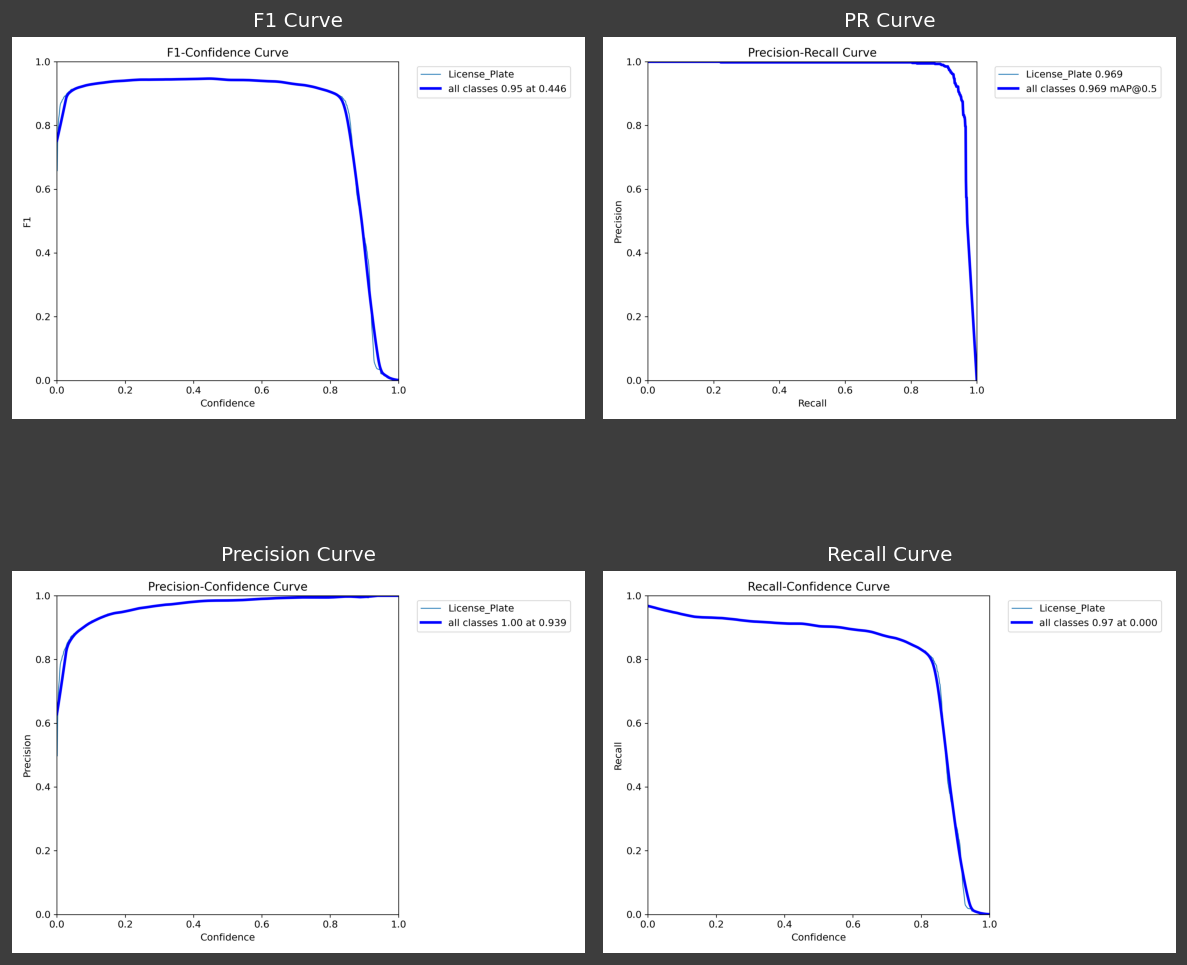

In [128]:
# Image paths and titles
images = [
    '/content/drive/MyDrive/YOLO/Trained_Folder/runs/F1_curve.png',
    '/content/drive/MyDrive/YOLO/Trained_Folder/runs/PR_curve.png',
    '/content/drive/MyDrive/YOLO/Trained_Folder/runs/P_curve.png',
    '/content/drive/MyDrive/YOLO/Trained_Folder/runs/R_curve.png']

titles = ['F1 Curve', 'PR Curve', 'Precision Curve', 'Recall Curve']

# Call the function to display images in a 2x2 grid with a specific dpi
display_images(images, titles, dpi=120, grid_color='#3D3D3d', figsize=(5, 5), rows= 2, cols =2)


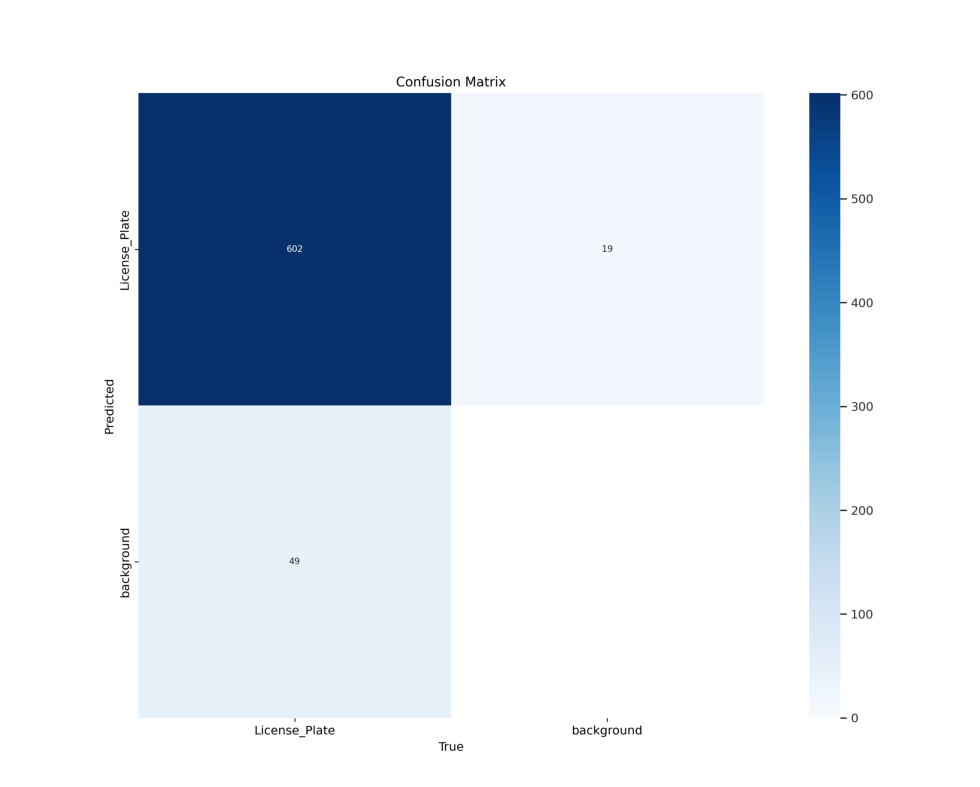

In [132]:
# Image path
confusion_matrix = '/content/drive/MyDrive/YOLO/Trained_Folder/runs/confusion_matrix.png'

# Call the function to display the confusion matrix with a specified dpi
display_images(confusion_matrix, titles="Confusion Matrix", dpi=200, rows =1, cols = 1, grid_color='#3D3D3d', figsize=(5, 5))

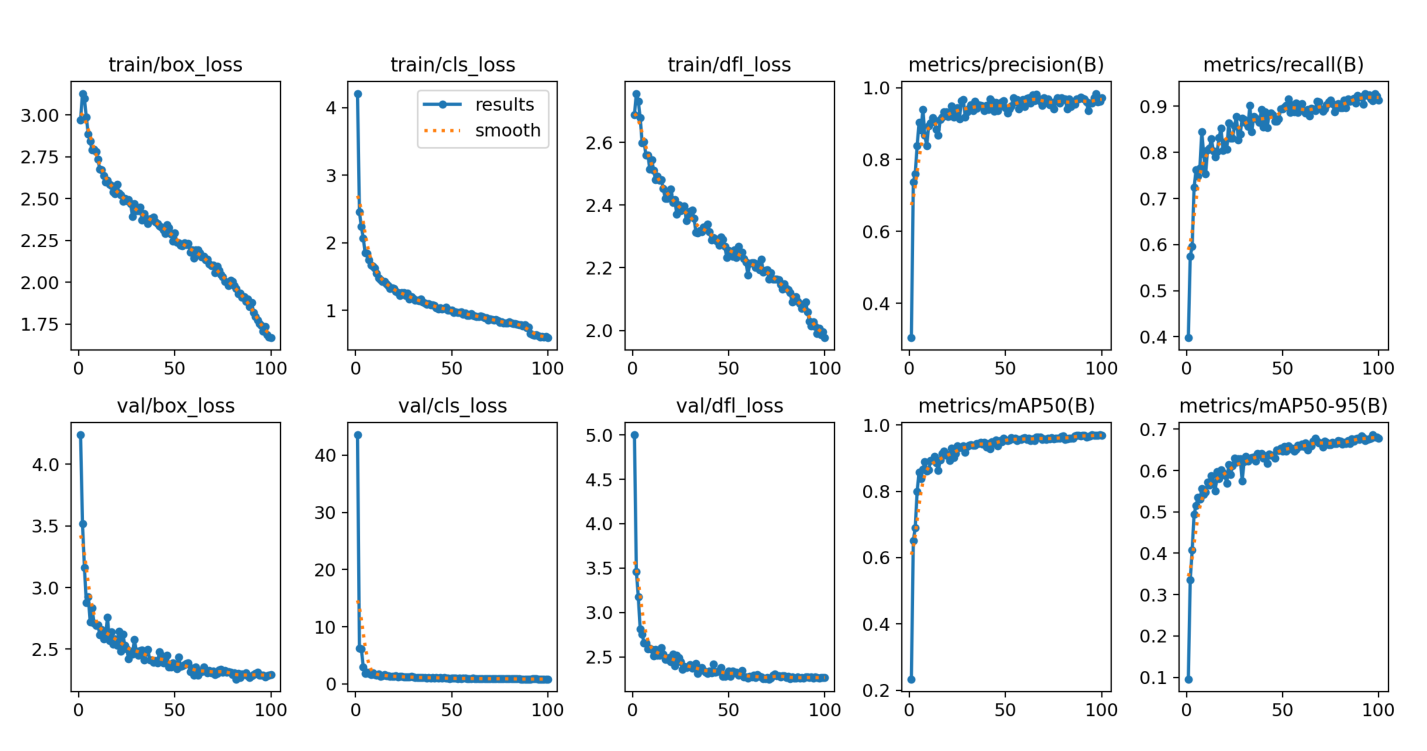

In [133]:
training_results = '/content/drive/MyDrive/YOLO/Trained_Folder/runs/results.png'


# Call the function to display the confusion matrix with a specified dpi
display_images(training_results, titles="Training Curves", dpi=120, grid_color='#3D3D3d', figsize=(12, 12))

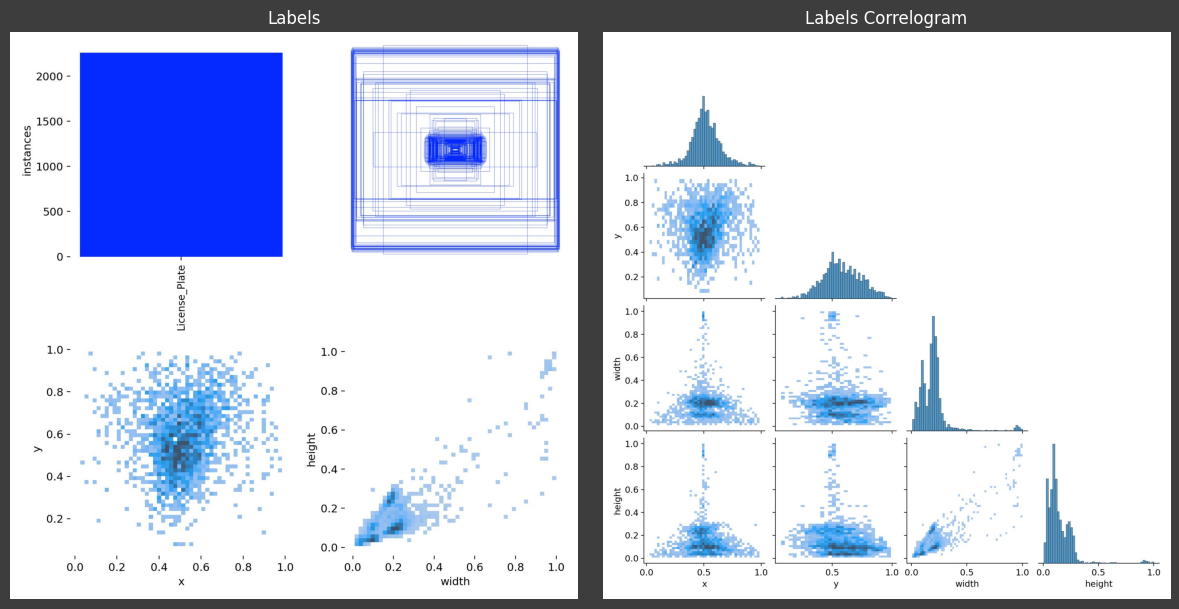

In [134]:
# Image paths
image_paths = [
    '/content/drive/MyDrive/YOLO/Trained_Folder/runs/labels.jpg',
    '/content/drive/MyDrive/YOLO/Trained_Folder/runs/labels_correlogram.jpg'
]

# Titles for the images
titles = ['Labels', 'Labels Correlogram']

# Call the function to display images in a 1x2 grid
display_images(image_paths, titles, figsize=(6, 6), dpi=100, grid_color='#3D3D3d', rows =1, cols = 2)

In [140]:
# Image paths
image_paths = [
    '/content/drive/MyDrive/YOLO/Trained_Folder/runs/val_batch1_labels.jpg',
    '/content/drive/MyDrive/YOLO/Trained_Folder/runs/val_batch1_pred.jpg',]

# Titles for the images
titles = ['Batch 1 Labels', 'Batch 1 Predictions']

# Call the function to display images in a 2x2 grid
display_images(image_paths, titles, figsize=(18,12), dpi=100, grid_color='#3D3D3d', rows = 1, cols =2)

Output hidden; open in https://colab.research.google.com to view.

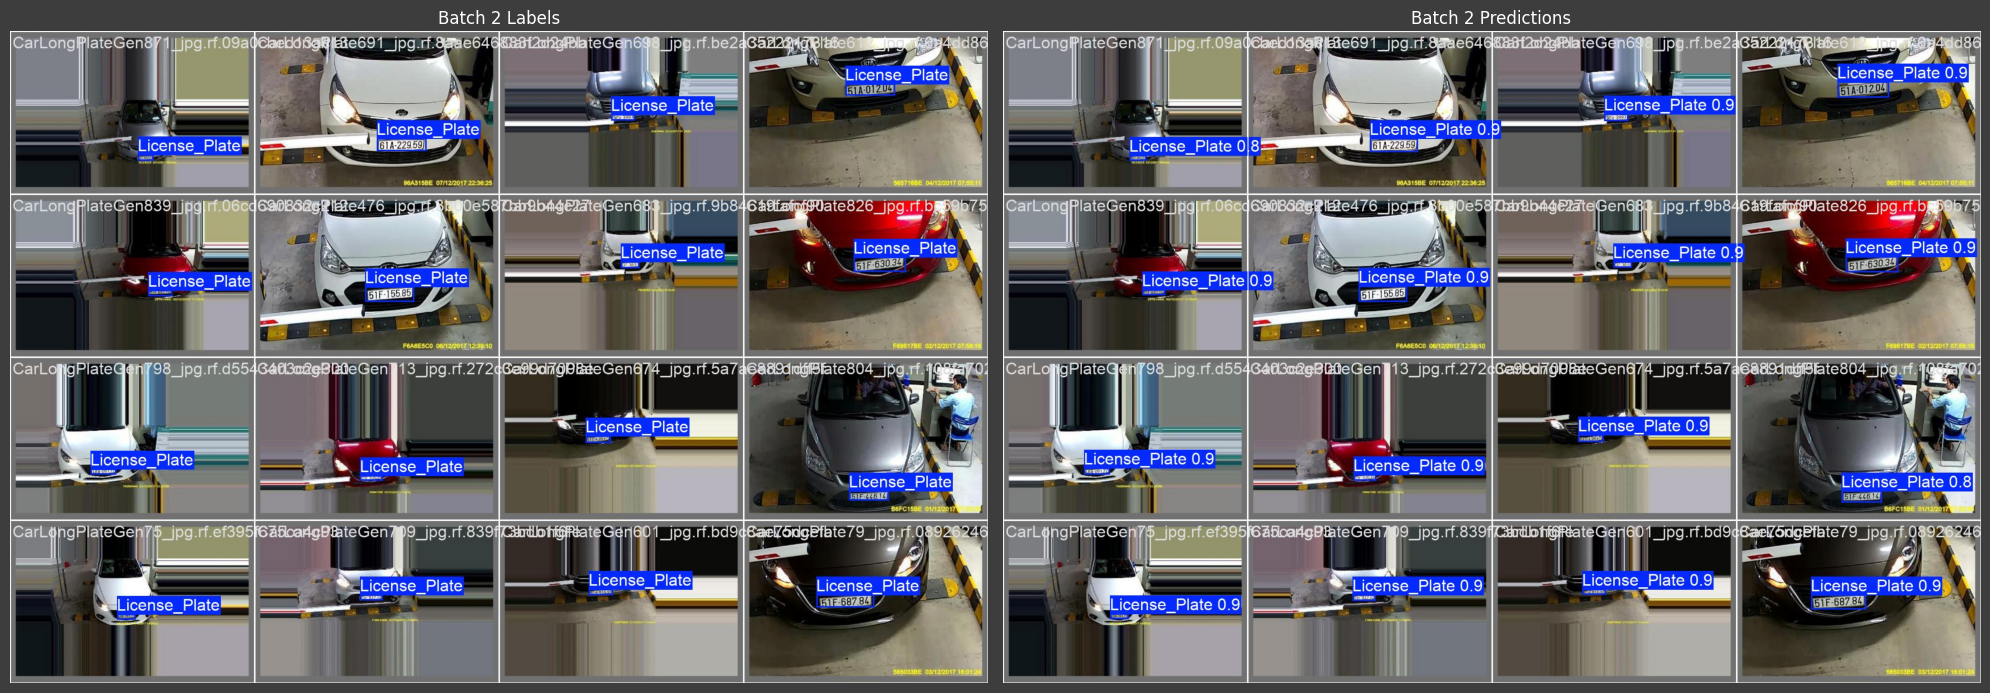

In [138]:
# Image paths
image_paths = [
    '/content/drive/MyDrive/YOLO/Trained_Folder/runs/val_batch2_labels.jpg',
    '/content/drive/MyDrive/YOLO/Trained_Folder/runs/val_batch2_pred.jpg']

# Titles for the images
titles = ['Batch 2 Labels', 'Batch 2 Predictions']

# Call the function to display images in a 2x2 grid
display_images(image_paths, titles, figsize=(10,10), dpi=100, grid_color='#3D3D3d', rows = 1, cols =2)

## Summary

### F1 Curve:
We observed that the F1 score for the model is exceptionally strong, particularly for the "License Plate" class. The F1 curve demonstrates a remarkable balance between precision and recall, with an F1 score of around 0.95 at high confidence levels. This shows that the model performs reliably, especially when it is certain about its predictions.

### Precision-Recall (PR) Curve:
From the PR curve, we can see that the model consistently achieves high precision across various recall levels, particularly for the "License Plate" class. Precision remains close to 1, with only slight drops as recall increases. This indicates that the model produces very few false positives and is proficient in identifying license plates accurately.

### Precision Curve:
As we analyzed the precision-confidence curve, it became clear that the model is nearly flawless in predicting the "License Plate" class when confident. Precision remains close to 100%, further reinforcing the reliability of the model’s predictions.

### Recall Curve:
We can see from the recall-confidence curve that recall slightly decreases as confidence increases. However, recall remains relatively stable overall, meaning the model rarely misses true instances of "License Plate." This highlights the model’s capability to capture most relevant instances effectively.

### Confusion Matrix:
The confusion matrix shows that the model correctly identified 602 "License Plate" instances while making only 19 false-positive predictions and 49 false-negative predictions. This analysis reveals the model’s ability to distinguish between the "License Plate" and "Background" classes effectively, with a low error rate and strong reliability.

### Training Losses:
1. **Box Loss**: We observed a steady decrease from approximately 3.0 to below 1.75, suggesting improved localization accuracy over time.
2. **Classification Loss**: The loss dropped sharply from 4.0 to below 1.0, which reflects increasing confidence in the model’s predictions.
3. **DFL Loss**: We noticed a consistent decline, indicating improved bounding box distribution predictions.

### Validation Losses:
The validation losses, including box, classification, and DFL losses, followed trends similar to the training losses. This consistency demonstrates that the model generalizes well to unseen data and avoids overfitting.

### Performance Metrics:
1. **Precision**: The model achieved a high precision score of **0.98**, indicating it made very few false positive predictions.
2. **Recall**: Recall was observed at **0.91**, showing the model effectively captured the majority of true positives.
3. **F1 Score**: With a value of **0.94**, the F1 score demonstrates a strong balance between precision and recall.
4. **mAP@0.5**: The model performed excellently with a **mean Average Precision (mAP) of 0.96** at an IoU threshold of 0.5, signifying accurate detections.
5. **mAP@0.5:0.95**: The mAP across multiple IoU thresholds stabilized at **0.68**, highlighting consistent performance in varying overlap conditions.


### Overall Insights:
From the results, we can see that the model excels in maintaining a balance between precision and recall. Its training and validation losses decreased consistently, highlighting strong generalization capabilities. Additionally, the high F1 scores and nearly flawless PR curves indicate that the model is well-suited for license plate detection tasks, with minimal errors and reliable results.
